In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 150

Kills = np.random.randint(5, 40, n)
Deaths = np.random.randint(1, 25, n)
#%
Accuracy = np.random.randint(10, 90, n)
#in-game units
MovementSpeed = np.random.randint(200, 350, n)
#seconds
ReactionTime = np.random.uniform(0.15, 0.45, n) 

Performance = (
    (Kills * 1.5) 
    - (Deaths * 0.8) 
    + (Accuracy * 0.6)
    + (MovementSpeed / 20)
    - (ReactionTime * 60)
    + np.random.randn(n) * 5
)
#Target performance (0–100)

In [3]:
df = pd.DataFrame({
    "Kills": Kills,
    "Deaths": Deaths,
    "Accuracy": Accuracy,
    "MovementSpeed": MovementSpeed,
    "ReactionTime": ReactionTime,
    "Performance": Performance
})

print(df.head())

   Kills  Deaths  Accuracy  MovementSpeed  ReactionTime  Performance
0     33      22        42            289      0.383281    54.497164
1     19      23        76            314      0.294111    53.546796
2     12       5        27            304      0.445586    19.534683
3     25       1        34            334      0.263022    62.558058
4     23       1        63            257      0.374873    61.813638


In [4]:
X = df.drop("Performance", axis=1)
y = df["Performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [6]:
y_pred = model.predict(X_test)

In [7]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 11.310103269603376
R² Score: 0.5746705595231552


In [8]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print(importances)

         Feature  Importance
0          Kills    0.480345
2       Accuracy    0.391275
1         Deaths    0.087591
4   ReactionTime    0.034148
3  MovementSpeed    0.006641


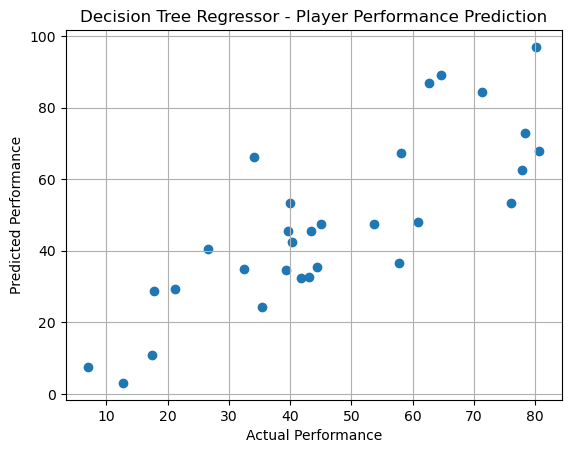

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Decision Tree Regressor - Player Performance Prediction")
plt.grid(True)
plt.show()